## Compare estimated velocity robustness between regvelo and veloVI

Notebook for evaluating robustness of velocity estimation

## Library imports

In [1]:
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import mplscience
import seaborn as sns

import scanpy as sc
import scvelo as scv

from rgv_tools import DATA_DIR, FIG_DIR
from rgv_tools.benchmarking import compute_average_correlations

/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_t

## Constants

In [2]:
DATASET = "hematopoiesis"

In [3]:
SAVE_FIGURES = True
if SAVE_FIGURES:
    (FIG_DIR / DATASET).mkdir(parents=True, exist_ok=True)

## Compute estimation robustness

In [4]:
velo_m = []
time_m = []
for nrun in range(10):
    velo_m.append(sc.read_h5ad(DATA_DIR / DATASET / "processed" / f"rgv_adata_runs_{nrun}.h5ad").layers["velocity"])
    time_m.append(sc.read_h5ad(DATA_DIR / DATASET / "processed" / f"rgv_adata_runs_{nrun}.h5ad").layers["fit_t"])

In [5]:
velo_rgv = compute_average_correlations(velo_m, method="p")

In [6]:
time_rgv = compute_average_correlations(time_m, method="sp")

In [7]:
velo_m = []
time_m = []
for nrun in range(10):
    velo_m.append(sc.read_h5ad(DATA_DIR / DATASET / "processed" / f"vi_adata_runs_{nrun}.h5ad").layers["velocity"])
    time_m.append(sc.read_h5ad(DATA_DIR / DATASET / "processed" / f"vi_adata_runs_{nrun}.h5ad").layers["fit_t"])

In [8]:
velo_vi = compute_average_correlations(velo_m, method="p")

In [9]:
time_vi = compute_average_correlations(time_m, method="sp")

## Compute velocity confidence

In [10]:
confi_rgv = []
for nrun in range(10):
    adata = sc.read_h5ad(DATA_DIR / DATASET / "processed" / f"rgv_adata_runs_{nrun}.h5ad")
    scv.tl.velocity_graph(adata)
    scv.tl.velocity_confidence(adata)
    confi_rgv.append(adata.obs["velocity_confidence"].mean())

computing velocity graph (using 1/112 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
computing velocity graph (using 1/112 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
computing velocity graph (using 1/112 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
computing velocity graph (using 1/112 cores)
    finished (0:00:01

In [11]:
confi_vi = []
for nrun in range(10):
    adata = sc.read_h5ad(DATA_DIR / DATASET / "processed" / f"vi_adata_runs_{nrun}.h5ad")
    scv.tl.velocity_graph(adata)
    scv.tl.velocity_confidence(adata)
    confi_vi.append(adata.obs["velocity_confidence"].mean())

computing velocity graph (using 1/112 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
computing velocity graph (using 1/112 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
computing velocity graph (using 1/112 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
computing velocity graph (using 1/112 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine 

## Plot benchmark results

In [12]:
dfs = []

g_df = pd.DataFrame({"velocity correlation": velo_rgv})
g_df["Method"] = "RegVelo"
dfs.append(g_df)

g_df = pd.DataFrame({"velocity correlation": velo_vi})
g_df["Method"] = "veloVI"
dfs.append(g_df)

velo_df = pd.concat(dfs, axis=0)
velo_df["Method"] = velo_df["Method"].astype("category")

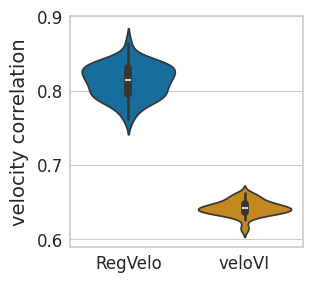

In [13]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))
    pal = {"RegVelo": "#0173b2", "veloVI": "#de8f05"}

    sns.violinplot(
        data=velo_df,
        ax=ax,
        # orient="h",
        x="Method",
        y="velocity correlation",
        order=["RegVelo", "veloVI"],
        palette=pal,
    )
    # plt.legend(title='', loc='lower center', bbox_to_anchor=(0.5, -0.6), ncol=3)
    ax.set_yticks([0.6, 0.7, 0.8, 0.9])
    ax.set_yticklabels([0.6, 0.7, 0.8, 0.9])
    plt.xlabel("")

    if SAVE_FIGURES:
        fig.savefig(FIG_DIR / DATASET / "velocity_robustness.svg", format="svg", transparent=True, bbox_inches="tight")
    plt.show()

In [14]:
dfs = []

g_df = pd.DataFrame({"time correlation": time_rgv})
g_df["Method"] = "RegVelo"
dfs.append(g_df)

g_df = pd.DataFrame({"time correlation": time_vi})
g_df["Method"] = "veloVI"
dfs.append(g_df)

time_df = pd.concat(dfs, axis=0)
time_df["Method"] = time_df["Method"].astype("category")

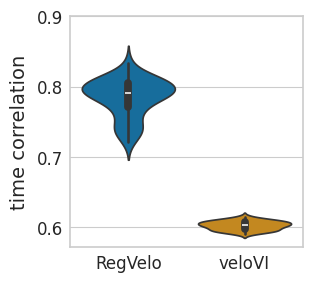

In [15]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))
    pal = {"RegVelo": "#0173b2", "veloVI": "#de8f05"}

    sns.violinplot(
        data=time_df,
        ax=ax,
        # orient="h",
        x="Method",
        y="time correlation",
        order=["RegVelo", "veloVI"],
        palette=pal,
    )
    # plt.legend(title='', loc='lower center', bbox_to_anchor=(0.5, -0.6), ncol=3)
    ax.set_yticks([0.6, 0.7, 0.8, 0.9])
    ax.set_yticklabels([0.6, 0.7, 0.8, 0.9])
    plt.xlabel("")

    if SAVE_FIGURES:
        fig.savefig(FIG_DIR / DATASET / "time_robustness.svg", format="svg", transparent=True, bbox_inches="tight")
    plt.show()

In [16]:
dfs = []

g_df = pd.DataFrame({"velocity confidence": confi_rgv})
g_df["Method"] = "RegVelo"
dfs.append(g_df)

g_df = pd.DataFrame({"velocity confidence": confi_vi})
g_df["Method"] = "veloVI"
dfs.append(g_df)

confi_df = pd.concat(dfs, axis=0)
confi_df["Method"] = confi_df["Method"].astype("category")

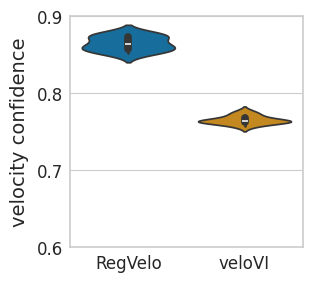

In [17]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))
    pal = {"RegVelo": "#0173b2", "veloVI": "#de8f05"}

    sns.violinplot(
        data=confi_df,
        ax=ax,
        # orient="h",
        x="Method",
        y="velocity confidence",
        order=["RegVelo", "veloVI"],
        palette=pal,
    )
    # plt.legend(title='', loc='lower center', bbox_to_anchor=(0.5, -0.6), ncol=3)
    ax.set_yticks([0.6, 0.7, 0.8, 0.9])
    ax.set_yticklabels([0.6, 0.7, 0.8, 0.9])
    plt.xlabel("")

    if SAVE_FIGURES:
        fig.savefig(FIG_DIR / DATASET / "velocity_confidence.svg", format="svg", transparent=True, bbox_inches="tight")
    plt.show()

## Test significance

In [18]:
scipy.stats.ttest_ind(velo_rgv, velo_vi, alternative="greater")

TtestResult(statistic=47.5942306011296, pvalue=6.913291028470966e-65, df=88.0)

In [19]:
scipy.stats.ttest_ind(time_rgv, time_vi, alternative="greater")

TtestResult(statistic=44.393343875292615, pvalue=2.484323625884492e-62, df=88.0)

In [20]:
scipy.stats.ttest_ind(confi_rgv, confi_vi, alternative="greater")

TtestResult(statistic=29.233032070958988, pvalue=6.332341886443939e-17, df=18.0)